In [1]:
%matplotlib inline

import numpy as np
import copy
import matplotlib.pyplot as plt
import pickle
import random
import torch
from utils import torch_from_numpy
import datetime

from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early, cfg_policy_evaluation_maxiter
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early
# num_iter_max=200000
env_name = 'CustomCartPole-v0'
figfilenamehead = "fig_policy_optimization_"+env_str+"_iter2_"

from config import cfg_alpha
alpha=cfg_alpha

loss_list = []
normalized_loss_list = []

policy_evaluation_maxiter = cfg_policy_evaluation_maxiter
print("policy_evaluation_maxiter",policy_evaluation_maxiter)
print("alpha",alpha)
print("seed",seed)
print(datetime.datetime.now())

policy_evaluation_maxiter 5
alpha 0.1
seed 2
2023-07-23 09:37:27.913893


In [2]:
import gym
import custom_gym
env = gym.make(env_name)

np.random.seed(seed)
random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)

4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:


from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
agent = SAC(env.observation_space.shape[0]+z_dim*2, env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_bamdp_weightedvae_")


offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))
debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)

Loading models from checkpoints/sac_checkpoint_custom_cartpole_bamdp_weightedvae_


In [4]:
args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":agent.policy.my_np_select_action,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}
# import vi_base
# vi = vi_base.baseVI(args_init_dict)
import vi_iw
iwvi = vi_iw.iwVI(args_init_dict)

# iwvi.load_base(ckpt_key="unweighted")
iwvi.load(ckpt_key="policy_optimization_iter1")

dec: h_dim 64
iwvi load ckpt1, ckpt2 ckpt_iwvi_basepartcartpole_policy_optimization_iter1 ckpt_iwvi_cartpole_policy_optimization_iter1
base load ckpt ckpt_basevi_cartpole_policy_optimization_iter1
base load self.initial_belief.data.sum() tensor(-8.4134)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(14.2850)
penalty_target_min tensor(-12.3135) penalty_target_max tensor(10.8386)
train_loss:  -10.847426011657713
valid_loss:  -10.08463058013916
h_min_tilde -12.3134775 ell_tilde -10.694866925354004 kappa_tilde 0.0007860113388587529
success load ckpt_iwvi_basepartcartpole_policy_optimization_iter1
train_loss:  -6.348815431821346
valid_loss:  -9.608433932304383
weight_alpha 1.0 h_min_tilde -12.3134775 ell_tilde -7.000739131917953 kappa_tilde 0.0004338511817896743


In [5]:
# plt.figure(figsize=(18,10), dpi=250)
# np_mulogvar = iwvi.mulogvar_offlinedata.numpy()
# plt.xlabel("daming coeff")
# plt.ylabel("latent variable mean")

# plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
# plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
# # plt.xlim([-0.05,0.35])
# for i in range(len(debug_info)):
#     plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
# plt.savefig(figfilenamehead+"damping_latent_"+env_str+"_iter0.png")
# plt.savefig(figfilenamehead+"damping_latent_"+env_str+"_iter0.eps")
# # plt.savefig(figfilenamehead+"damping_latent_"+env_str+"_iter0.pdf")
# plt.show()


# for i in range(10):
#     print(debug_info[i*10 : (i+1)*10,1])
# # plt.show()
# print("摩擦係数-潜在変数")

In [6]:
iwvi.get_real_rollout_bamdppolicy_data()


 0 1.1920928955078125e-06


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):



 1 3.498373031616211

 2 3.329399824142456

 3 3.3081319332122803

 4 3.3278238773345947

 5 3.2448694705963135

 6 3.2184388637542725

 7 3.336379051208496

 8 3.4033703804016113

 9 3.219797372817993

 10 3.4247851371765137

 11 3.437509536743164

 12 3.255232334136963

 13 3.5123696327209473

 14 3.357149839401245

 15 3.2748780250549316

 16 3.367724657058716

 17 3.3340413570404053

 18 3.3166115283966064

 19 3.8794023990631104

 20 3.5453641414642334

 21 3.2454373836517334

 22 3.4958832263946533

 23 3.497415542602539

 24 3.4569528102874756

 25 3.432211399078369

 26 3.523745059967041

 27 3.5366930961608887

 28 3.6037492752075195

 29 3.579777479171753

 30 3.52174711227417

 31 3.4158477783203125

 32 3.4526185989379883

 33 3.609112024307251

 34 3.440174102783203

 35 3.5327985286712646

 36 3.818579912185669

 37 3.510802984237671

 38 3.233111619949341

 39 3.3945558071136475

 40 3.40464448928833

 41 3.373241424560547

 42 3.331242561340332

 43 3.593308210372925



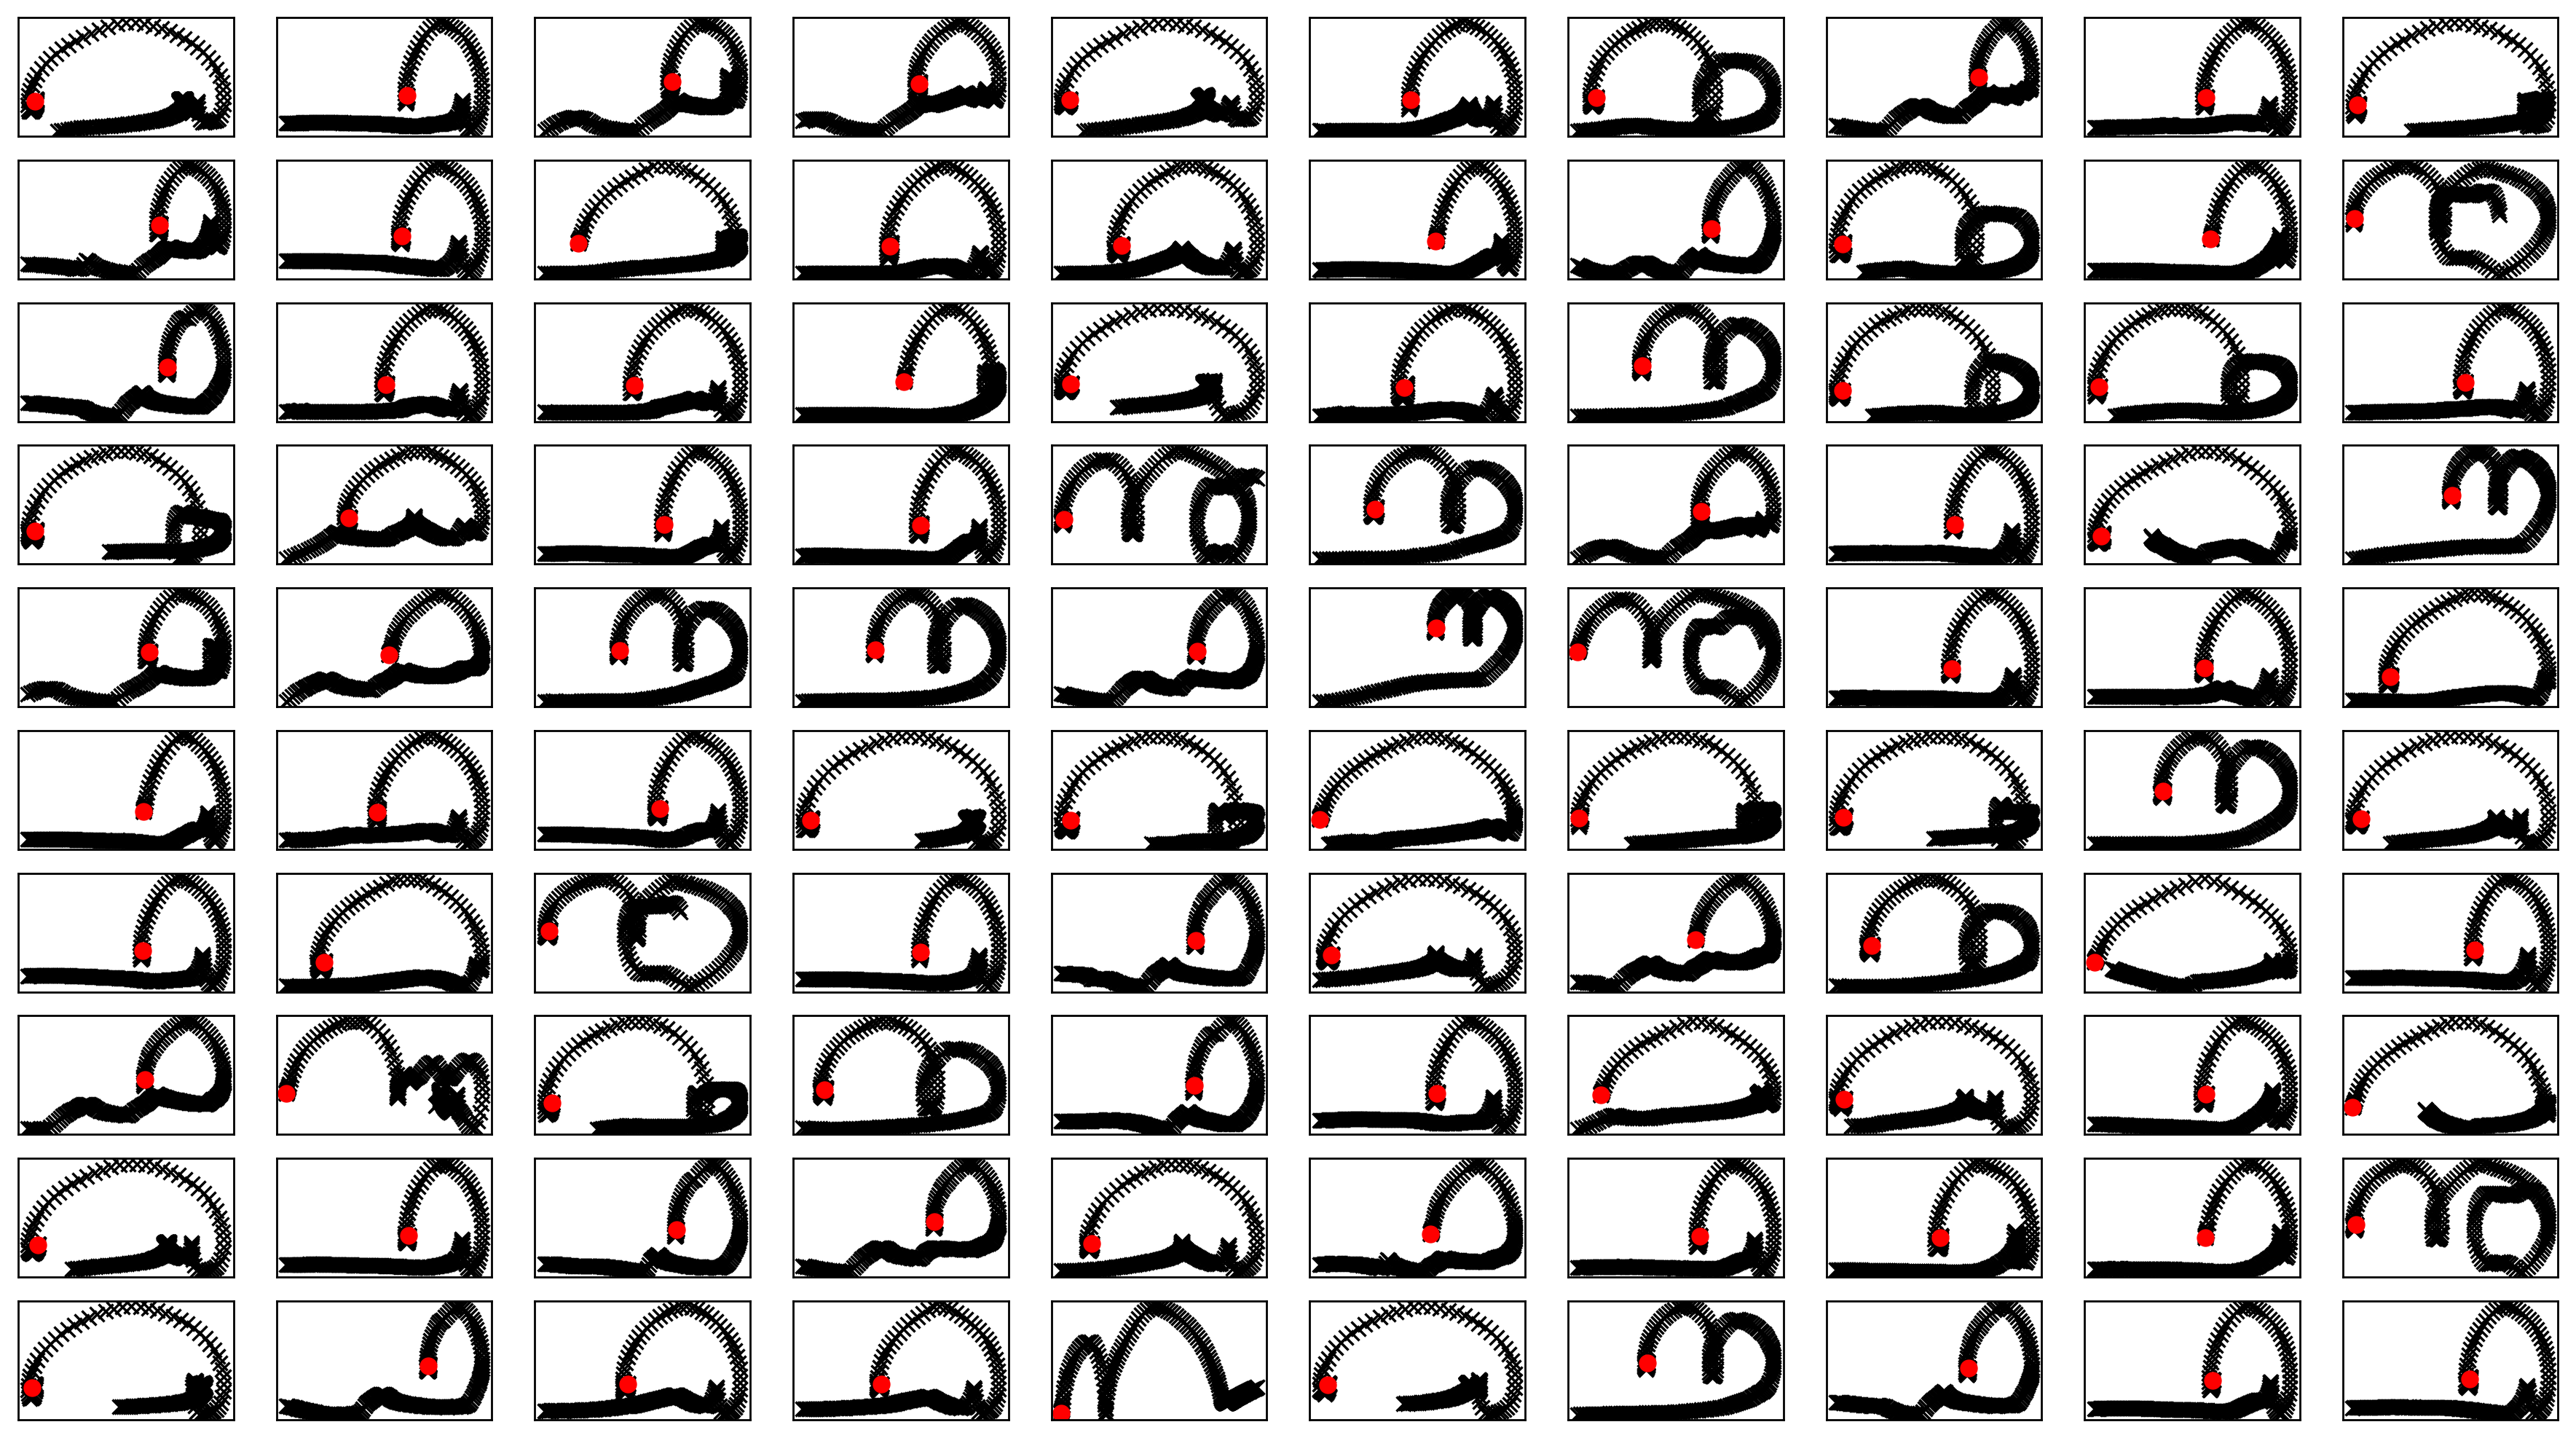

In [7]:
fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx") 
    ax_list[-1].plot(0, 0,"ro")
plt.show()

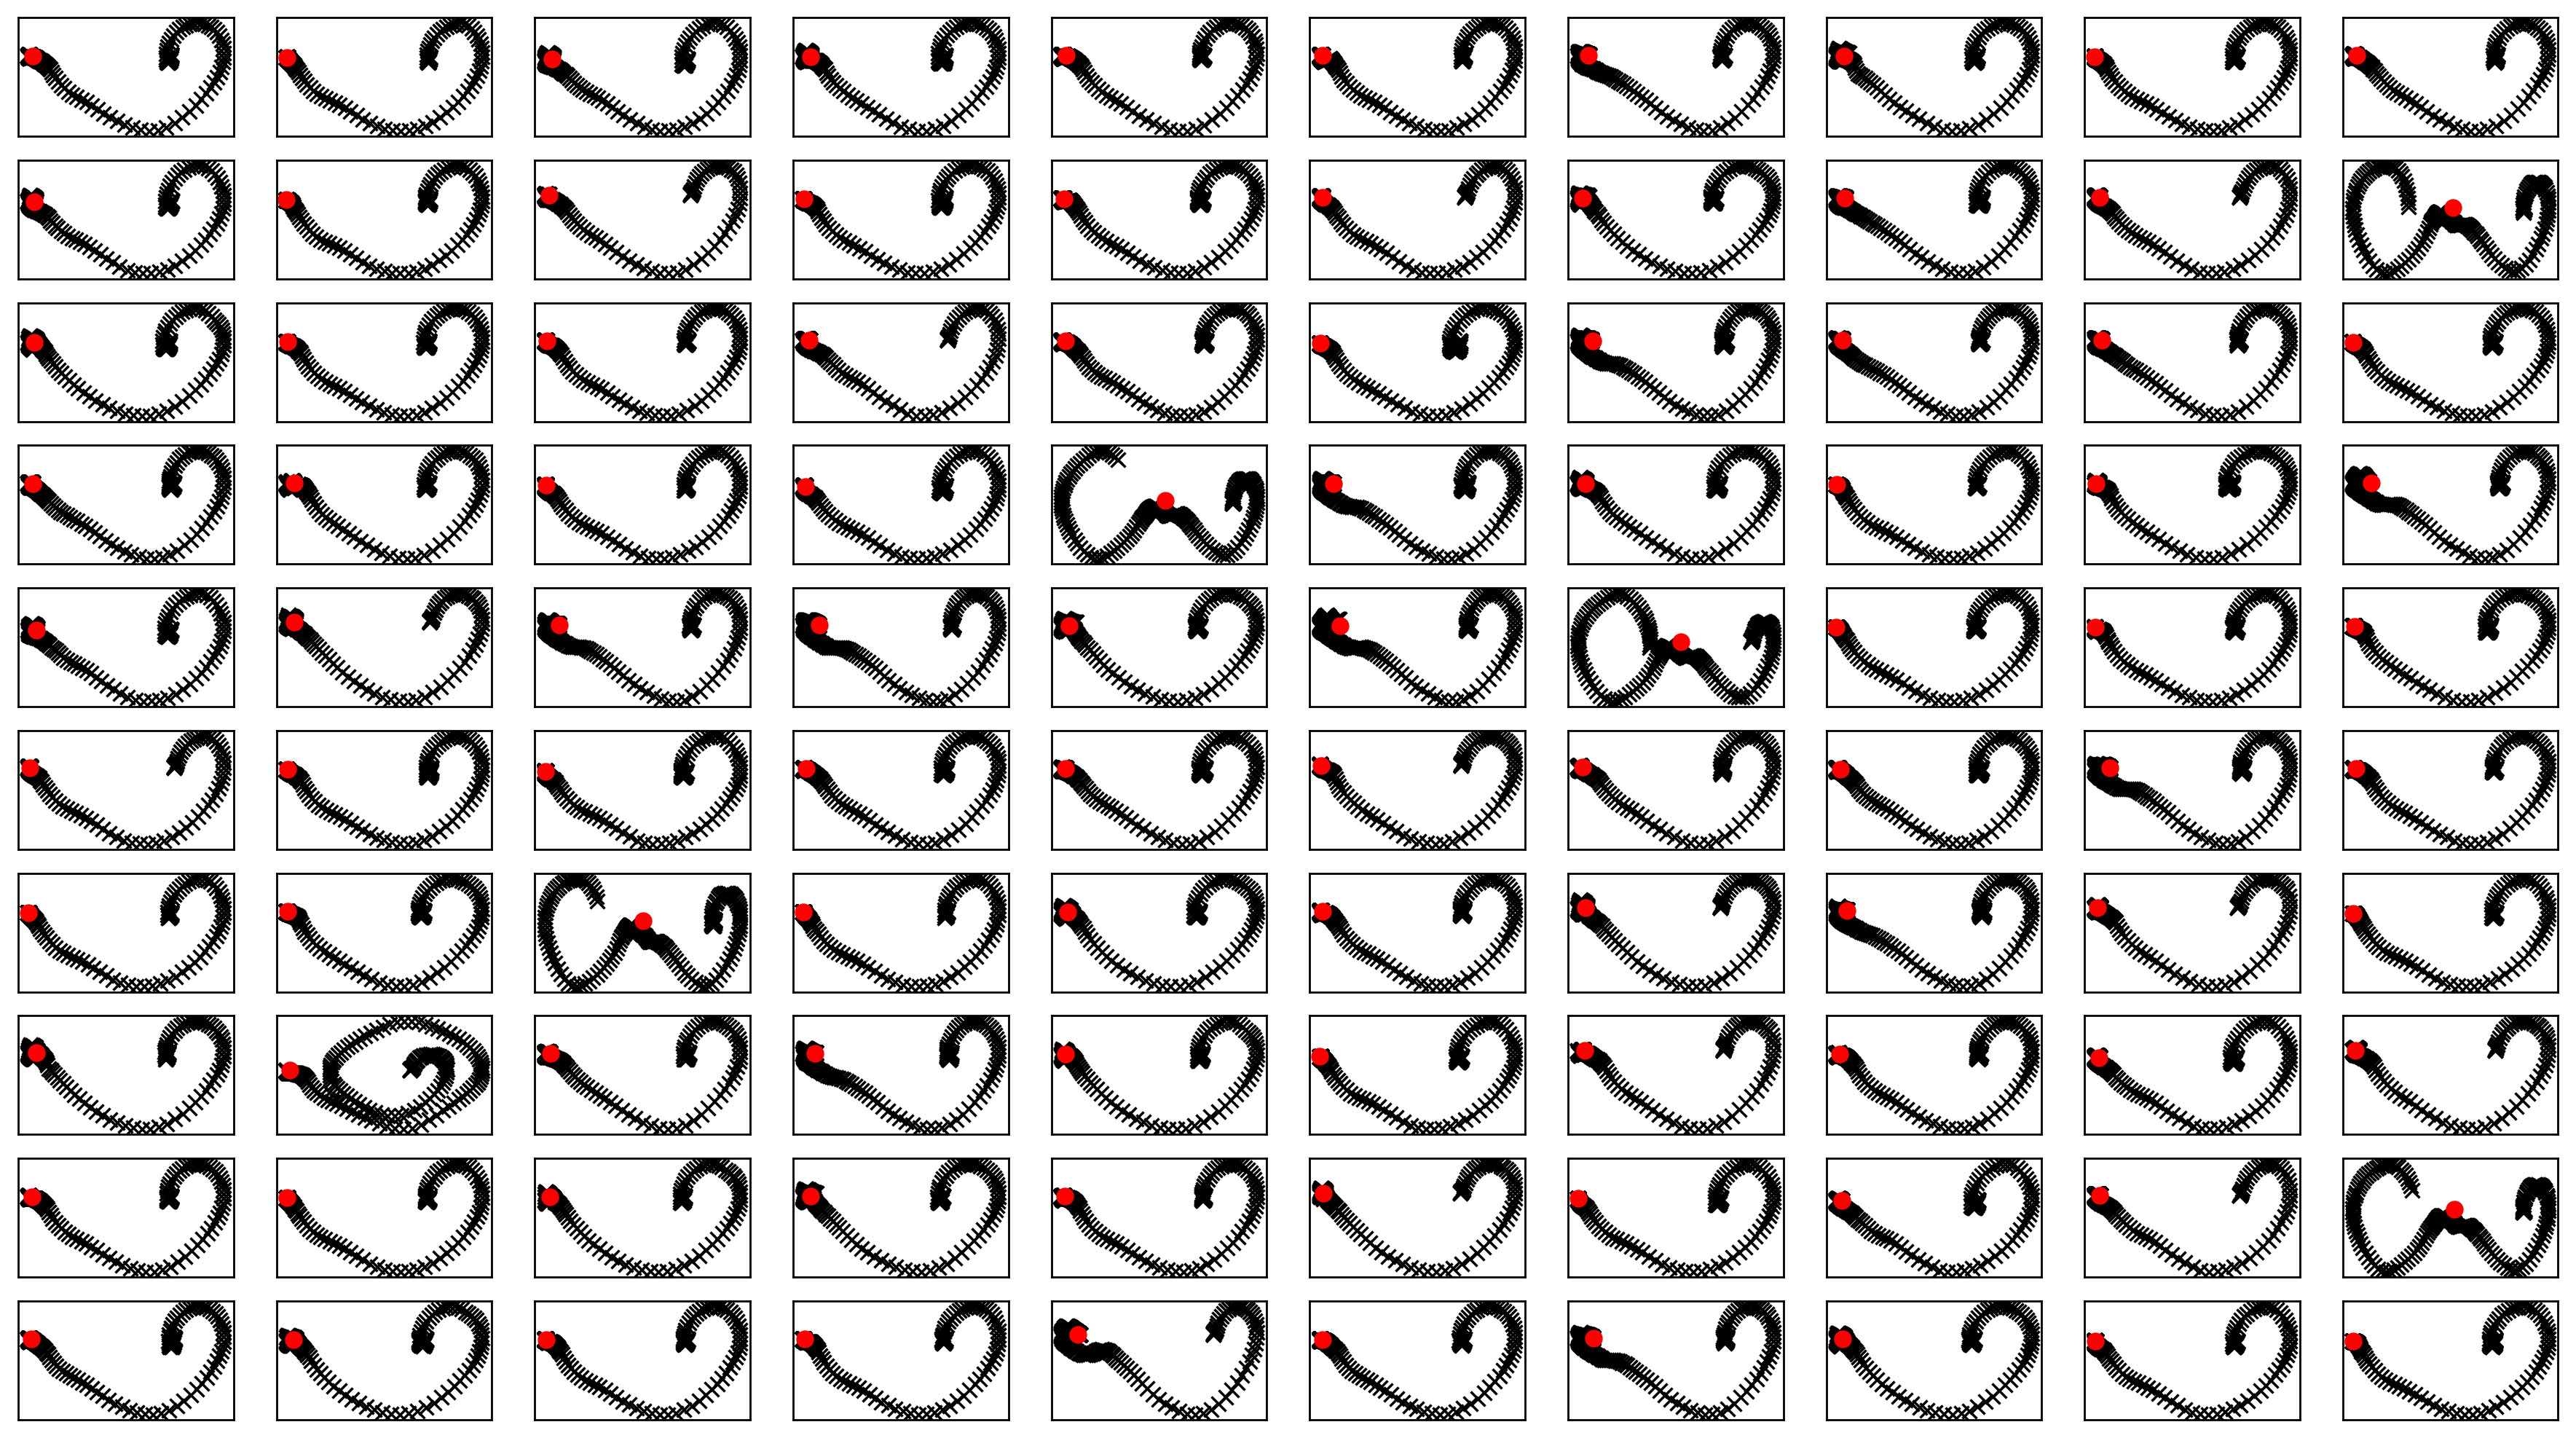

In [8]:
fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,2], iwvi.debug_realenv_rolloutdata[i][:,3],"kx") 
    ax_list[-1].plot(0, 0,"ro")
plt.show()

In [ ]:
iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
simdata0a = copy.deepcopy(iwvi.simenv_rolloutdata)
iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
simdata0b = copy.deepcopy(iwvi.simenv_rolloutdata)


 0 7.152557373046875e-07

 1 3.385282039642334

 2 3.223635673522949

 3 3.2793688774108887

 4 3.306633234024048

 5 3.379931688308716

 6 3.271216630935669

 7 3.4201552867889404

 8 3.6913957595825195

 9 3.44640851020813

 10 3.5854806900024414

 11 3.47711443901062

 12 3.518632650375366

 13 6.638769149780273

 14 5.991772174835205

 15 3.414135694503784

 16 3.298064708709717

 17 3.4466311931610107

 18 3.433659791946411

 19 3.281363010406494

 20 3.4949960708618164

 21 3.2646994590759277

 22 3.344619035720825

 23 3.442840576171875

 24 3.4014899730682373

 25 3.3731038570404053

 26 3.665518283843994

 27 3.4447731971740723

 28 3.400146484375

 29 3.3542771339416504

 30 3.3778493404388428

 31 3.390909433364868

 32 3.2628824710845947

 33 3.5384154319763184

 34 3.516852378845215

 35 3.4038400650024414

 36 3.404597759246826

 37 3.579932689666748

 38 3.3648810386657715

 39 3.488856792449951

 40 3.399596929550171

 41 6.888230800628662

 42 6.852928161621094

 43 6

In [ ]:

fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    ax_list[-1].plot(simdata0a[i][:,0], simdata0a[i][:,1]) 
    ax_list[-1].plot(simdata0b[i][:,0], simdata0b[i][:,1]) 
#     ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 

    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")
plt.savefig(figfilenamehead+"iter1.png")
# plt.savefig(figfilenamehead+"iter0.pdf")
plt.savefig(figfilenamehead+"iter1.eps")
print("実環境方策rollout vs Sim環境方策rollout")

In [ ]:

fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    ax_list[-1].plot(simdata0a[i][:,2], simdata0a[i][:,3]) 
    ax_list[-1].plot(simdata0b[i][:,2], simdata0b[i][:,3]) 
#     ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 

    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,2], iwvi.debug_realenv_rolloutdata[i][:,3],"kx")
    ax_list[-1].plot(0, 0,"ro")
plt.savefig(figfilenamehead+"iter0.png")
# plt.savefig(figfilenamehead+"iter0.pdf")
plt.savefig(figfilenamehead+"iter0.eps")
print("実環境方策rollout vs Sim環境方策rollout")

In [ ]:
print(datetime.datetime.now())